In [20]:
%load_ext autoreload
from src.utils import VideoInterpTripletsDataset
from src.train import trainGAN
from src.eval import evalGAN

from torch.utils.data import DataLoader
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
%autoreload 2

In [24]:
dataset = VideoInterpTripletsDataset('datasets/frames/train', read_frames=True)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4, drop_last=True)
valset = VideoInterpTripletsDataset('datasets/frames/val',read_frames=True)
valloader = DataLoader(valset,batch_size=32,shuffle=True,num_workers=4) 

#print(dataloader)
#print(valloader)



ValueError: num_samples should be a positive integeral value, but got num_samples=0

In [15]:
print(dataloader)

In [17]:

generator, discriminator = trainGAN(1, dataloader, valloader=valloader,supervised=True, save_path='./experiments/v5', save_every=1, gan=True, unet=False)

Video (h,w): (240, 320)
Created models
GPU: GeForce GTX 1060 with Max-Q Design, number: 0
Initialized weights
Set up models


FileNotFoundError: Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\torch\utils\data\dataloader.py", line 138, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "C:\Anaconda\lib\site-packages\torch\utils\data\dataloader.py", line 138, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "C:\Users\Monu\DeepLearning\DFIV2\src\utils.py", line 74, in __getitem__
    .format(self.directory, self.filenames[file], i)) for i in range(index, index + 3)]
  File "C:\Users\Monu\DeepLearning\DFIV2\src\utils.py", line 74, in <listcomp>
    .format(self.directory, self.filenames[file], i)) for i in range(index, index + 3)]
  File "C:\Anaconda\lib\site-packages\numpy\lib\utils.py", line 101, in newfunc
    return func(*args, **kwds)
  File "C:\Anaconda\lib\site-packages\scipy\misc\pilutil.py", line 164, in imread
    im = Image.open(name)
  File "C:\Anaconda\lib\site-packages\PIL\Image.py", line 2580, in open
    fp = builtins.open(filename, "rb")
FileNotFoundError: [Errno 2] No such file or directory: 'datasets/frames/train/v_ApplyEyeMakeup_g08_c01-52.jpg'


In [10]:
# valset = VideoInterpTripletsDataset('datasets/frames_512/val',read_frames=True)
# valloader = DataLoader(valset,batch_size=32,shuffle=True,num_workers=4)

Filenames
['tempo', 'wow']
Frame read, (h,w) is (288,512)


/home/jupyter/Deep-Frame-Interpolation/src/eval.py:35: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(os.path.exists(load_path),"model dict does not exist")


./experiments/unet/1_val_generator_generated.png
./experiments/unet/1_val_generator_real.png

Avg. PNSR:18.0761 dB
5007.066914857854


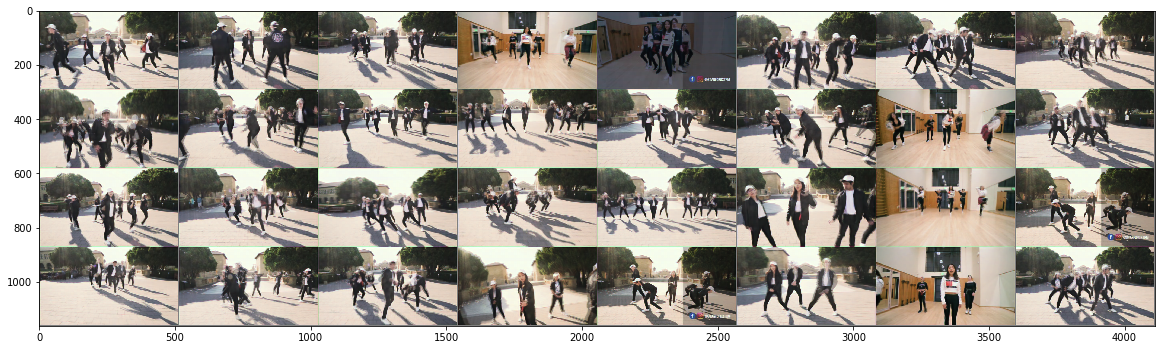

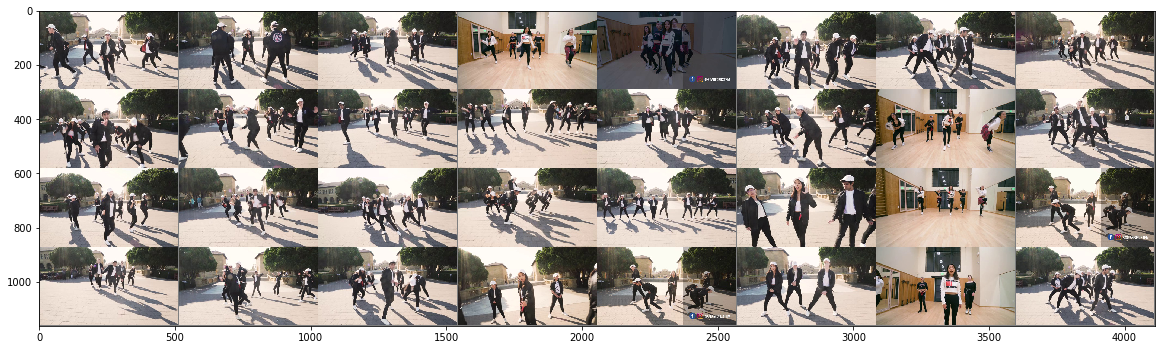

In [19]:
# print(evalGAN(valloader,load_path = "./experiments/unet/30_Generator",sampleImagesName="unet/30/30_val))

In [ ]:
testset = VideoInterpTripletsDataset('datasets/frames_512/test',read_frames=True)
testloader  = DataLoader(testset,batch_size=32,shuffle=True,num_workers=4)

In [ ]:
evalGAN(testloader,"./models/512_Small_Test_SGAN",sampleImagesName="512_Small_SGAN_test")